In [2]:
# !pip install country_converter
# !pip install psycopg2
import pandas as pd
from sqlalchemy import create_engine

In [70]:
country_data_file = "resources/countries of the world.csv"
country_data_file_df = pd.read_csv(country_data_file)
country_data_file_df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


# Data Cleanup

In [71]:
Cost_of_Living_file = "resources\Cost_of_Living_Index_2022.csv"
Cost_of_Living_df = pd.read_csv(Cost_of_Living_file)
Cost_of_Living_df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


In [72]:
# Create a filtered dataframe from specific columns
country_data_cols = ["Country", 
                     "Region", 
                     "Population", 
                     "Pop. Density (per sq. mi.)", 
                     "Net migration", 
                     "Infant mortality (per 1000 births)", 
                     "GDP ($ per capita)", 
                     "Literacy (%)", 
                     "Phones (per 1000)", 
                     "Birthrate", 
                     "Deathrate"]
country_data_transformed = country_data_file_df[country_data_cols].copy()

In [73]:
# Replace space with underscore "_"
for col in country_data_transformed:
    country_data_transformed = country_data_transformed.rename(columns={col: col.replace(' (%)', '')})
    country_data_transformed = country_data_transformed.rename(columns={col: col.replace(' ', '_')})
country_data_transformed.head()

,Country,Region,Population,Pop._Density_(per_sq._mi.),Net_migration,Infant_mortality_(per_1000_births),GDP_($_per_capita),Literacy,Phones_(per_1000),Birthrate,Deathrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,"48,0","23,06","163,07",700.0,"36,0","3,2","46,6","20,34"
1,Albania,EASTERN EUROPE,3581655,"124,6","-4,93","21,52",4500.0,"86,5","71,2","15,11","5,22"
2,Algeria,NORTHERN AFRICA,32930091,"13,8","-0,39",31,6000.0,"70,0","78,1","17,14","4,61"
3,American Samoa,OCEANIA,57794,"290,4","-20,71","9,27",8000.0,"97,0","259,5","22,46","3,27"
4,Andorra,WESTERN EUROPE,71201,"152,1","6,6","4,05",19000.0,"100,0","497,2","8,71","6,25"


In [74]:
# Rename the column headers
Cost_of_Living_data_transformed = Cost_of_Living_df

for col in Cost_of_Living_data_transformed:
    Cost_of_Living_data_transformed = Cost_of_Living_data_transformed.rename(columns={col: col.replace(' ', '_')})
Cost_of_Living_data_transformed.head()


,Rank,Country,Cost_of_Living_Index,Rent_Index,Cost_of_Living_Plus_Rent_Index,Groceries_Index,Restaurant_Price_Index,Local_Purchasing_Power_Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


In [75]:
# Country name cleanup for consistencies - removal of 'the', 'end spacing' and 'symbol'
import country_converter as coco
some_names = country_data_transformed['Country'].to_list()
standard_names = coco.convert(names=some_names, to='name_short')
# print(standard_names)
country_data_transformed['Country']=standard_names
# country_data_transformed

Netherlands Antilles  not found in regex
Virgin Islands  not found in regex


In [76]:
some_names = Cost_of_Living_data_transformed['Country'].to_list()
standard_names = coco.convert(names=some_names, to='name_short')
# print(standard_names)
Cost_of_Living_data_transformed['Country']=standard_names
# Cost_of_Living_data_transformed

# Data Conversion

In [77]:
# Replacing ',' with '.'
# converting numeric fields to float

for col in country_data_transformed.columns:
    if not (col == 'Country' or col == 'Region' or col == 'Population'):
        try:
            country_data_transformed[col] = country_data_transformed[col].str.replace(",", ".").astype(float)
        except AttributeError:
            print(f'skipped {col}')
country_data_transformed.dtypes

skipped GDP_($_per_capita)


Country                                object
Region                                 object
Population                              int64
Pop._Density_(per_sq._mi.)            float64
Net_migration                         float64
Infant_mortality_(per_1000_births)    float64
GDP_($_per_capita)                    float64
Literacy                              float64
Phones_(per_1000)                     float64
Birthrate                             float64
Deathrate                             float64
dtype: object

In [78]:
# Replacing ',' with '.'
# converting numeric fields to float

for col in Cost_of_Living_data_transformed.columns:
    if not (col == 'Country'):
        try:
            Cost_of_Living_data_transformed[col] = Cost_of_Living_data_transformed[col].str.replace(",", ".").astype(float)
        except AttributeError:
            print(f'skipped {col}')
Cost_of_Living_data_transformed.dtypes

skipped Rank
skipped Cost_of_Living_Index
skipped Rent_Index
skipped Cost_of_Living_Plus_Rent_Index
skipped Groceries_Index
skipped Restaurant_Price_Index
skipped Local_Purchasing_Power_Index


Rank                                int64
Country                            object
Cost_of_Living_Index              float64
Rent_Index                        float64
Cost_of_Living_Plus_Rent_Index    float64
Groceries_Index                   float64
Restaurant_Price_Index            float64
Local_Purchasing_Power_Index      float64
dtype: object

### Averge out duplicated countries ie Palestines (West Bank & Gaza Strip)
### remove country with "not found"

In [114]:
# country_data_transformed = country_data_transformed.fillna(0)
country_data_transformed = country_data_transformed.groupby(['Country', 'Region']).mean().reset_index()
country_data_transformed[country_data_transformed['Country'] != "not found"]

,Country,Region,Population,Pop._Density_(per_sq._mi.),Net_migration,Infant_mortality_(per_1000_births),GDP_($_per_capita),Literacy,Phones_(per_1000),Birthrate,Deathrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,48.0,23.06,163.07,700.0,36.0,3.2,46.60,20.34
1,Albania,EASTERN EUROPE,3581655.0,124.6,-4.93,21.52,4500.0,86.5,71.2,15.11,5.22
2,Algeria,NORTHERN AFRICA,32930091.0,13.8,-0.39,31.00,6000.0,70.0,78.1,17.14,4.61
3,American Samoa,OCEANIA,57794.0,290.4,-20.71,9.27,8000.0,97.0,259.5,22.46,3.27
4,Andorra,WESTERN EUROPE,71201.0,152.1,6.60,4.05,19000.0,100.0,497.2,8.71,6.25
...,...,...,...,...,...,...,...,...,...,...,...
219,Wallis and Futuna Islands,OCEANIA,16025.0,58.5,NaN,NaN,3700.0,50.0,118.6,NaN,NaN
220,Western Sahara,NORTHERN AFRICA,273008.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,Yemen,NEAR EAST,21456188.0,40.6,0.00,61.50,800.0,50.2,37.2,42.89,8.30
222,Zambia,SUB-SAHARAN AFRICA,11502010.0,15.3,0.00,88.29,800.0,80.6,8.2,41.00,19.93


# Connection to PostgreSQL 

In [3]:
# Create a config.py with password in the same directory as current file.
# File content example: password = "xyz"

from config import password

protocol = 'postgresql'
username = 'postgres'
host = 'localhost'
port = 5432
database_name = 'CountriesDB'


rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)
engine.table_names()

C:\Users\hk_la\AppData\Local\Temp/ipykernel_10140/2211397261.py:15: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['countries', 'cost_of_living']

## Load Data to Postgre

In [4]:
country_data_transformed.to_sql('countries', con=engine, if_exists='replace', index=False)
pd.read_sql_query('select * from countries', con=engine)

NameError: name 'country_data_transformed' is not defined

In [118]:
Cost_of_Living_data_transformed.to_sql('cost_of_living', con=engine, if_exists='replace', index=False)
pd.read_sql_query('select * from cost_of_living', con=engine)

,Rank,Country,Cost_of_Living_Index,Rent_Index,Cost_of_Living_Plus_Rent_Index,Groceries_Index,Restaurant_Price_Index,Local_Purchasing_Power_Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
...,...,...,...,...,...,...,...,...
134,135,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41
135,136,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38
136,137,Yemen,53.14,6.71,31.38,67.12,24.74,14.41
137,138,Zambia,33.04,9.26,21.90,31.53,22.46,40.33


In [119]:
combined_df = pd.read_sql_query('select * from cost_of_living INNER JOIN countries ON countries."Country" = cost_of_living."Country"', con=engine)
combined_df = combined_df.loc[:,~combined_df.columns.duplicated()]

# GDP Vs x
## GDP Vs Cost of Living Index 

In [120]:
LivingEx = pd.read_sql_query('SELECT countries."Country", "GDP_($_per_capita)", "Cost_of_Living_Index", "Cost_of_Living_Plus_Rent_Index" FROM cost_of_living \
            INNER JOIN countries ON countries."Country" = cost_of_living."Country"', con=engine)
LivingEx

,Country,GDP_($_per_capita),Cost_of_Living_Index,Cost_of_Living_Plus_Rent_Index
0,Afghanistan,700.0,20.37,12.09
1,Albania,4500.0,35.50,22.83
2,Algeria,6000.0,26.87,16.43
3,Argentina,11200.0,34.69,22.04
4,Armenia,3500.0,33.89,23.45
...,...,...,...,...
132,Venezuela,4800.0,43.20,27.63
133,Vietnam,2500.0,37.48,26.11
134,Yemen,800.0,53.14,31.38
135,Zambia,800.0,33.04,21.90


The r-squared is: 0.6440953890792985


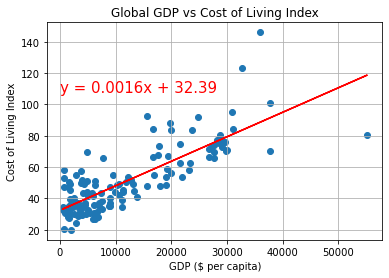

In [97]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

x_values = LivingEx['GDP_($_per_capita)']
y_values = LivingEx['Cost_of_Living_Index']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values * slope) + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(46, 107.5),fontsize=15,color="red")
plt.title(f'Global GDP vs Cost of Living Index')
plt.ylabel('Cost of Living Index')
plt.xlabel('GDP ($ per capita)')
print(f"The r-squared is: {rvalue**2}")
plt.grid()
filename= f'Cost of Living Index r-squared {rvalue**2}.png'
plt.savefig(f'images/{filename}', facecolor="white", dpi=300, bbox_inches='tight')
plt.show()

# GDP Vs Cost of Living + Rent Index 

The r-squared is: 0.6608242970414517


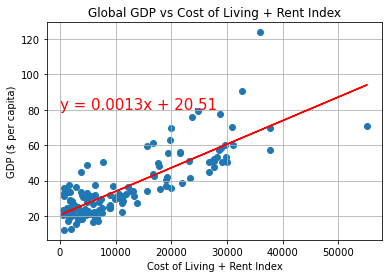

In [98]:
x_values = LivingEx['GDP_($_per_capita)']
y_values = LivingEx['Cost_of_Living_Plus_Rent_Index']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values * slope) + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(46, 80.5),fontsize=15,color="red")
plt.title(f'Global GDP vs Cost of Living + Rent Index')
plt.xlabel('Cost of Living + Rent Index')
plt.ylabel('GDP ($ per capita)')
print(f"The r-squared is: {rvalue**2}")
plt.grid()
filename= f'Cost of Living and rent Index r-squared {rvalue**2}.png'
plt.savefig(f'images/{filename}', facecolor="white", dpi=300, bbox_inches='tight')
plt.show()

# GDP Vs Literacy_(%)

In [99]:
LiteracyDf = pd.read_sql_query('SELECT countries."Country", "GDP_($_per_capita)", "Literacy" FROM cost_of_living \
            INNER JOIN countries ON countries."Country" = cost_of_living."Country"', con=engine)
LiteracyDf

,Country,GDP_($_per_capita),Literacy
0,Afghanistan,700.0,36.0
1,Albania,4500.0,86.5
2,Algeria,6000.0,70.0
3,Argentina,11200.0,97.1
4,Armenia,3500.0,98.6
...,...,...,...
132,Venezuela,4800.0,93.4
133,Vietnam,2500.0,90.3
134,Yemen,800.0,50.2
135,Zambia,800.0,80.6


The r-squared is: nan


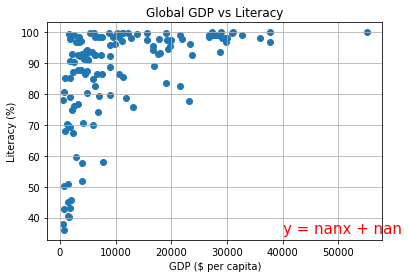

In [100]:
x_values = LiteracyDf['GDP_($_per_capita)']
y_values = LiteracyDf['Literacy']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40000, 35),fontsize=15,color="red")
plt.title(f'Global GDP vs Literacy')
plt.ylabel('Literacy (%)')
plt.xlabel('GDP ($ per capita)')
print(f"The r-squared is: {rvalue**2}")
plt.grid()
filename= f'Literacy r-squared {rvalue**2}.png'
plt.savefig(f'images/{filename}', facecolor="white", dpi=300, bbox_inches='tight')
plt.show()

# GDP Vs Birth Rate

In [101]:
pop_rate = pd.read_sql_query('SELECT countries."Country", "GDP_($_per_capita)", "Birthrate", "Deathrate", \
    "Infant_mortality_(per_1000_births)" FROM cost_of_living INNER JOIN countries ON \
    countries."Country" = cost_of_living."Country"', con=engine)
pop_rate

,Country,GDP_($_per_capita),Birthrate,Deathrate,Infant_mortality_(per_1000_births)
0,Afghanistan,700.0,46.60,20.34,163.07
1,Albania,4500.0,15.11,5.22,21.52
2,Algeria,6000.0,17.14,4.61,31.00
3,Argentina,11200.0,16.73,7.55,15.18
4,Armenia,3500.0,12.07,8.23,23.28
...,...,...,...,...,...
132,Venezuela,4800.0,18.71,4.92,22.20
133,Vietnam,2500.0,16.86,6.22,25.95
134,Yemen,800.0,42.89,8.30,61.50
135,Zambia,800.0,41.00,19.93,88.29


The r-squared is: nan


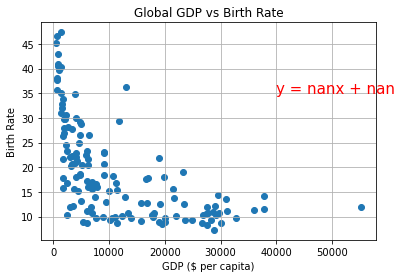

In [102]:
x_values = pop_rate['GDP_($_per_capita)']
y_values = pop_rate['Birthrate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40000, 35),fontsize=15,color="red")
plt.title(f'Global GDP vs Birth Rate')
plt.ylabel('Birth Rate')
plt.xlabel('GDP ($ per capita)')
print(f"The r-squared is: {rvalue**2}")
plt.grid()
filename= f'Birthrate r-squared {rvalue**2}.png'
plt.savefig(f'images/{filename}', facecolor="white", dpi=300, bbox_inches='tight')
plt.show()

# GDP VS Death Rate

The r-squared is: nan


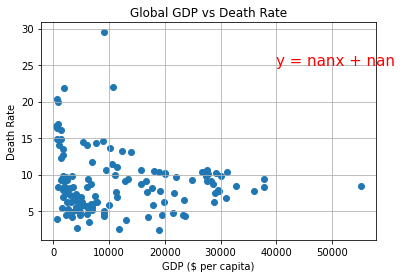

In [103]:
x_values = pop_rate['GDP_($_per_capita)']
y_values = pop_rate['Deathrate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40000, 25),fontsize=15,color="red")
plt.title(f'Global GDP vs Death Rate')
plt.ylabel('Death Rate')
plt.xlabel('GDP ($ per capita)')
print(f"The r-squared is: {rvalue**2}")
plt.grid()
filename= f'Deathrate r-squared {rvalue**2}.png'
plt.savefig(f'images/{filename}', facecolor="white", dpi=300, bbox_inches='tight')
plt.show()

# GDP Vs Infant mortality

The r-squared is: 0.37658526690597577


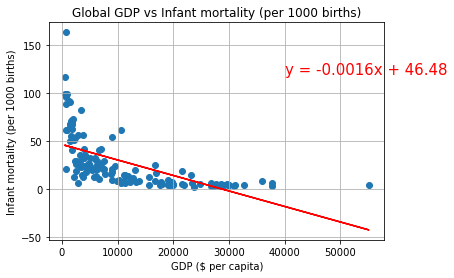

In [104]:
x_values = pop_rate['GDP_($_per_capita)']
y_values = pop_rate['Infant_mortality_(per_1000_births)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values * slope) + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40000, 120),fontsize=15,color="red")
plt.title(f'Global GDP vs Infant mortality (per 1000 births)')
plt.ylabel('Infant mortality (per 1000 births)')
plt.xlabel('GDP ($ per capita)')
print(f"The r-squared is: {rvalue**2}")
plt.grid()
filename= f'Infant mortality r-squared {rvalue**2}.png'
plt.savefig(f'images/{filename}', facecolor="white", dpi=300, bbox_inches='tight')
plt.show()

# Queries

# Literacy
## Top 10 By Literacy % & GDP

In [105]:
LiteracyDf_top = LiteracyDf.sort_values(by=['Literacy', 'GDP_($_per_capita)'], ascending=False).reset_index(drop=True)
LiteracyDf_top['Rank_Literacy'] = LiteracyDf.index + 1
LiteracyDf_top.head(10)

,Country,GDP_($_per_capita),Literacy,Rank_Literacy
0,Luxembourg,55100.0,100.0,1
1,Norway,37800.0,100.0,2
2,Denmark,31100.0,100.0,3
3,Australia,29000.0,100.0,4
4,Finland,27400.0,100.0,5
5,Iceland,30900.0,99.9,6
6,Czech Republic,15700.0,99.9,7
7,Estonia,12300.0,99.8,8
8,Poland,11100.0,99.8,9
9,Latvia,10200.0,99.8,10


## Bottom 10 By Literacy % & GDP

In [106]:
LiteracyDf_bottom = LiteracyDf.sort_values(by=['Literacy', 'GDP_($_per_capita)'], ascending=True).head(10).reset_index(drop=True)
LiteracyDf_bottom

,Country,GDP_($_per_capita),Literacy
0,Afghanistan,700.0,36.0
1,Somalia,500.0,37.8
2,Senegal,1600.0,40.2
3,Iraq,1500.0,40.4
4,Ethiopia,700.0,42.7
5,Bangladesh,1900.0,43.1
6,Nepal,1400.0,45.2
7,Pakistan,2100.0,45.7
8,Yemen,800.0,50.2
9,Cote d'Ivoire,1400.0,50.9


# Cost of Living
## Top 10 Countries by Cost of Living Index

In [107]:
LivingEx_top = LivingEx[['Country', 'Cost_of_Living_Index', 'GDP_($_per_capita)']].sort_values(by=['Cost_of_Living_Index', \
                       'GDP_($_per_capita)'], ascending=False).reset_index(drop=True)
LivingEx_top['Rank_CoL'] = LivingEx_top.index + 1
LivingEx_top.head(100)

,Country,Cost_of_Living_Index,GDP_($_per_capita),Rank_CoL
0,Bermuda,146.04,36000.0,1
1,Switzerland,123.35,32700.0,2
2,Norway,100.90,37800.0,3
3,Iceland,94.86,30900.0,4
4,Barbados,92.37,15700.0,5
...,...,...,...,...
95,Indonesia,35.85,3200.0,96
96,Myanmar,35.67,1800.0,97
97,Albania,35.50,4500.0,98
98,Mexico,35.35,9000.0,99


## Bottom 10 Countries by Cost of Living Index 

In [108]:
LivingEx_bottom = LivingEx[['Country', 'Cost_of_Living_Index', 'GDP_($_per_capita)']].sort_values(by=['Cost_of_Living_Index', \
                       'GDP_($_per_capita)'], ascending=True).head(10).reset_index(drop=True)
LivingEx_bottom

,Country,Cost_of_Living_Index,GDP_($_per_capita)
0,Pakistan,19.92,2100.0
1,Afghanistan,20.37,700.0
2,India,24.43,2900.0
3,Colombia,26.72,6300.0
4,Algeria,26.87,6000.0
5,Uzbekistan,27.31,1700.0
6,Tunisia,27.87,6900.0
7,Nepal,28.29,1400.0
8,Turkey,28.31,6700.0
9,Kazakhstan,28.68,6300.0


# Top 10 Countries by Cost of Living plus Rent index

In [61]:
Living_top = LivingEx[['Country', 'Cost_of_Living_Plus_Rent_Index', 'GDP_($_per_capita)']].sort_values(by=['Cost_of_Living_Plus_Rent_Index', \
                       'GDP_($_per_capita)'], ascending=False).reset_index(drop=True)
Living_top['Rank_CoL_Rent'] = Living_top.index + 1
Living_top.head(10)

,Country,Cost_of_Living_Plus_Rent_Index,GDP_($_per_capita),Rank_CoL_Rent
0,Bermuda,123.80,36000.0,1
1,Switzerland,90.62,32700.0,2
2,Jersey,79.51,24800.0,3
3,Hong Kong,77.83,28800.0,4
4,Singapore,75.75,23700.0,5
5,Luxembourg,70.93,55100.0,6
6,Iceland,70.05,30900.0,7
7,Norway,69.86,37800.0,8
8,Guernsey,69.73,20000.0,9
9,Israel,62.69,19800.0,10


In [62]:
Living_bottom = LivingEx[['Country', 'Cost_of_Living_Plus_Rent_Index', 'GDP_($_per_capita)']].sort_values(by=['Cost_of_Living_Plus_Rent_Index', \
                       'GDP_($_per_capita)'], ascending=True).head(10).reset_index(drop=True)
Living_bottom

,Country,Cost_of_Living_Plus_Rent_Index,GDP_($_per_capita)
0,Afghanistan,12.09,700.0
1,Pakistan,12.42,2100.0
2,India,15.47,2900.0
3,Algeria,16.43,6000.0
4,Nepal,16.89,1400.0
5,Tunisia,17.30,6900.0
6,Syria,17.70,3300.0
7,Colombia,18.03,6300.0
8,Turkey,18.15,6700.0
9,Egypt,18.41,4000.0


# Life expectancy
## Top 10 Countries by Infant Mortality

In [63]:
infant_top = pop_rate[['Country','GDP_($_per_capita)','Infant_mortality_(per_1000_births)']].sort_values(by=['Infant_mortality_(per_1000_births)', \
                     'GDP_($_per_capita)'], ascending=False).reset_index(drop=True)
infant_top['Rank_infant_mortality'] = infant_top.index + 1
infant_top.head(10)

,Country,GDP_($_per_capita),Infant_mortality_(per_1000_births),Rank_infant_mortality
0,Afghanistan,700.0,163.07,1
1,Somalia,500.0,116.70,2
2,Nigeria,900.0,98.80,3
3,Tanzania,600.0,98.54,4
4,Ethiopia,700.0,95.32,5
5,Rwanda,1300.0,91.23,6
6,Cote d'Ivoire,1400.0,90.83,7
7,Zambia,800.0,88.29,8
8,Azerbaijan,3400.0,81.74,9
9,Pakistan,2100.0,72.44,10


# Bottom 10 Countries by Infant Mortality

In [64]:
infant_bottom = pop_rate[['Country','GDP_($_per_capita)','Infant_mortality_(per_1000_births)']].sort_values(by=['Infant_mortality_(per_1000_births)', \
                     'GDP_($_per_capita)'], ascending=True).head(10).reset_index(drop=True)
infant_bottom

,Country,GDP_($_per_capita),Infant_mortality_(per_1000_births)
0,Singapore,23700.0,2.29
1,Sweden,26800.0,2.77
2,Hong Kong,28800.0,2.97
3,Japan,28200.0,3.26
4,Iceland,30900.0,3.31
5,Finland,27400.0,3.57
6,Norway,37800.0,3.70
7,Malta,17700.0,3.89
8,Czech Republic,15700.0,3.93
9,Germany,27600.0,4.16


## Top 10 Countries by Birth Rate 

In [65]:
Birth_top = pop_rate[['Country','GDP_($_per_capita)','Birthrate']].sort_values(by=['Birthrate', 'GDP_($_per_capita)'], \
                      ascending=False).reset_index(drop=True)
Birth_top['Rank_Birth'] = Birth_top.index + 1
Birth_top.head(10)

,Country,GDP_($_per_capita),Birthrate,Rank_Birth
0,Uganda,1400.0,47.35,1
1,Afghanistan,700.0,46.60,2
2,Somalia,500.0,45.13,3
3,Yemen,800.0,42.89,4
4,Zambia,800.0,41.00,5
5,Nigeria,900.0,40.43,6
6,Rwanda,1300.0,40.37,7
7,Kenya,1000.0,39.72,8
8,Ethiopia,700.0,37.98,9
9,Tanzania,600.0,37.71,10


## Bottom 10 Countries by Birth rate

In [66]:
Birth_bottom = pop_rate[['Country','GDP_($_per_capita)','Birthrate']].sort_values(by=['Birthrate', 'GDP_($_per_capita)'], \
                      ascending=True).head(10).reset_index(drop=True)
Birth_bottom

,Country,GDP_($_per_capita),Birthrate
0,Hong Kong,28800.0,7.29
1,Germany,27600.0,8.25
2,Macau,19400.0,8.48
3,Italy,26700.0,8.72
4,Austria,30000.0,8.74
5,Lithuania,11400.0,8.75
6,Bosnia and Herzegovina,6100.0,8.77
7,Guernsey,20000.0,8.81
8,Ukraine,5400.0,8.82
9,Slovenia,19000.0,8.98


## Top 10 Countries by Death Rate

In [67]:
Death_top = pop_rate[['Country','GDP_($_per_capita)','Deathrate']].sort_values(by=['Deathrate', 'GDP_($_per_capita)'], \
                      ascending=False).reset_index(drop=True)
Death_top['Rank_Death'] = Death_top.index + 1 
Death_top

,Country,GDP_($_per_capita),Deathrate,Rank_Death
0,Botswana,9000.0,29.50,1
1,South Africa,10700.0,22.00,2
2,Zimbabwe,1900.0,21.84,3
3,Afghanistan,700.0,20.34,4
4,Zambia,800.0,19.93,5
...,...,...,...,...
132,Libya,6400.0,3.48,133
133,Jordan,4300.0,2.65,134
134,Saudi Arabia,11800.0,2.58,135
135,Kuwait,19000.0,2.41,136


## Bottom 10 Countries by Death rate

In [68]:
Death_bottom = pop_rate[['Country','GDP_($_per_capita)','Deathrate']].sort_values(by=['Deathrate', 'GDP_($_per_capita)'], \
                      ascending=True).head(10).reset_index(drop=True)
Death_bottom

,Country,GDP_($_per_capita),Deathrate
0,Kuwait,19000.0,2.41
1,Saudi Arabia,11800.0,2.58
2,Jordan,4300.0,2.65
3,Libya,6400.0,3.48
4,Oman,13100.0,3.81
5,Palestine,700.0,3.86
6,Bahrain,16900.0,4.14
7,Ecuador,3300.0,4.23
8,Singapore,23700.0,4.28
9,Costa Rica,9100.0,4.36


# Overview

In [38]:
country_core = combined_df[['Country', 'Region', 'Population', 'GDP_($_per_capita)']]
LiteracyDf_top = LiteracyDf_top[['Country', 'Rank_Literacy']]
Living_top = Living_top[['Country', 'Rank_CoL_Rent']]
LivingEx_top = LivingEx_top[['Country', 'Rank_CoL']]
infant_top = infant_top[['Country', 'Rank_infant_mortality']]
Birth_top = Birth_top[['Country', 'Rank_Birth']]
Death_top = Death_top[['Country', 'Rank_Death']]

merge_one = pd.merge(country_core, LiteracyDf_top, on='Country')
merge_two = pd.merge(merge_one, LivingEx_top, how='inner', on='Country')
merge_three = pd.merge(merge_two, Living_top, on='Country')
merge_four = pd.merge(merge_three, infant_top, on='Country')
merge_five = pd.merge(merge_four, Birth_top, on='Country')
result = pd.merge(merge_five, Death_top, on='Country')

In [40]:
result.to_csv('Countries Ranking Overview.csv', index=False)